In [4]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
allFiles = ['skin_data_'+str(i)+'.csv' for i in range(1,4)]
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_,ignore_index=True)
df=df.drop(df.columns[0],1)

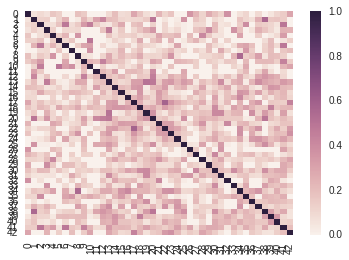

In [12]:
#http://stackoverflow.com/questions/36887743/computing-cosine-similarity-between-all-texts-in-a-corpus
#http://brandonrose.org/clustering

import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

#can also try porterstemmer or lancasterstemmer
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english', ngram_range=(1,3), max_df=0.4, max_features=200000, min_df=0.1)

txt = df.loc[df['response_type']=='asker','response']
tfidf = vectorizer.fit_transform(txt)
from sklearn.metrics.pairwise import cosine_similarity
sns.heatmap(cosine_similarity(tfidf))

In [14]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)

%time km.fit(tfidf)

clusters = km.labels_.tolist()

CPU times: user 184 ms, sys: 0 ns, total: 184 ms
Wall time: 261 ms
